In [3]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
#from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm  
import os
import re
#import skimage
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
#from image_similarity_measures.quality_metrics import fsim, issm
import pandas as pd
from numpy import asarray
#from sewar.full_ref import mse, rmse, psnr, uqi,ergas, scc, rase, sam, msssim, vifp

In [4]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_training_cropped_photos/'
img_array = []

sketch_path = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_training_cropped_sketches/'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(asarray(image))

    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(asarray(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(asarray(img7))

for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(asarray(image))

    #Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(asarray(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(asarray(img7))

100%|██████████| 88/88 [00:00<00:00, 429.99it/s]


In [5]:
image_path_test = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_testing_cropped_photos/'
test_img_array = []

sketch_path_test = '/Users/wayne0032/Documents/Applied-Data-Mining/CUHK-Dataset/CUHK_testing_cropped_sketches/'
test_sketch_array = []

test_image_file = sorted_alphanumeric(os.listdir(image_path_test))
test_sketch_file = sorted_alphanumeric(os.listdir(sketch_path_test))

for i in tqdm(test_image_file):
    image = cv2.imread(image_path_test + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    test_img_array.append(asarray(image))

for i in tqdm(test_sketch_file):
    image = cv2.imread(sketch_path_test + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    test_sketch_array.append(asarray(image))

100%|██████████| 100/100 [00:00<00:00, 1153.65it/s]


In [6]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
print("Total number of sketch images:",len(test_sketch_array))
print("Total number of images:",len(test_img_array))

Total number of sketch images: 704
Total number of images: 704
Total number of sketch images: 100
Total number of images: 100


In [7]:
train_sketch_image = sketch_array
train_image = img_array
test_sketch_image = test_sketch_array
test_image = test_img_array
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 256, 256, 3)
Test color image shape (100, 256, 256, 3)


In [8]:
#Model

import keras
from keras import layers

latent_dim = 12


input_img = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model_convAE = keras.Model(input_img, decoded)

# Separable conv encoder
model_convAE_encoder = keras.Model(input_img, encoded)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-10 07:35:14.441270: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 07:35:14.441394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model_convAE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584 

Epoch 1/500


2023-03-10 07:35:20.479596: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-10 07:35:20.999770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.6902

2023-03-10 07:35:30.212665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 10s 2s/step - loss: 0.6902 - val_loss: 0.6908
Epoch 2/500
3/3 [==============================] - 6s 2s/step - loss: 0.6806 - val_loss: 0.6865
Epoch 3/500
3/3 [==============================] - 6s 2s/step - loss: 0.6541 - val_loss: 0.6785
Epoch 4/500
3/3 [==============================] - 5s 2s/step - loss: 0.5893 - val_loss: 0.7105
Epoch 5/500
3/3 [==============================] - 5s 2s/step - loss: 0.4875 - val_loss: 0.9887
Epoch 6/500
3/3 [==============================] - 5s 2s/step - loss: 0.4473 - val_loss: 1.3437
Epoch 7/500
3/3 [==============================] - 6s 2s/step - loss: 0.4537 - val_loss: 1.1382
Epoch 8/500
3/3 [==============================] - 6s 2s/step - loss: 0.4194 - val_loss: 0.8856
Epoch 9/500
3/3 [==============================] - 5s 2s/step - loss: 0.4200 - val_loss: 0.8128
Epoch 10/500
3/3 [==============================] - 5s 2s/step - loss: 0.4234 - val_loss: 0.8600
Epoch 11/500
3/3 [==============================] 

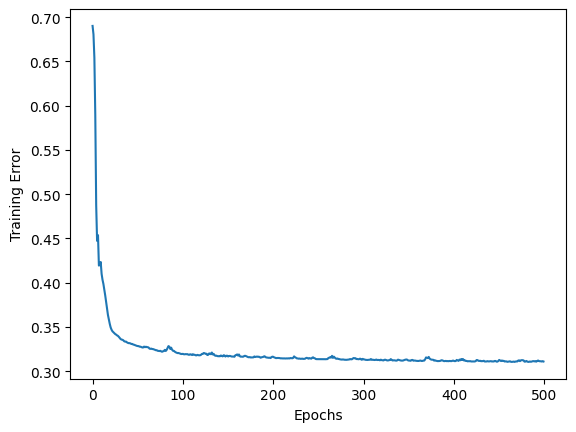

In [9]:
model_convAE.compile(optimizer='adam', loss='binary_crossentropy')

hist = model_convAE.fit(train_image, train_sketch_image,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(test_sketch_image, test_image))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Text(0, 0.5, 'Loss')

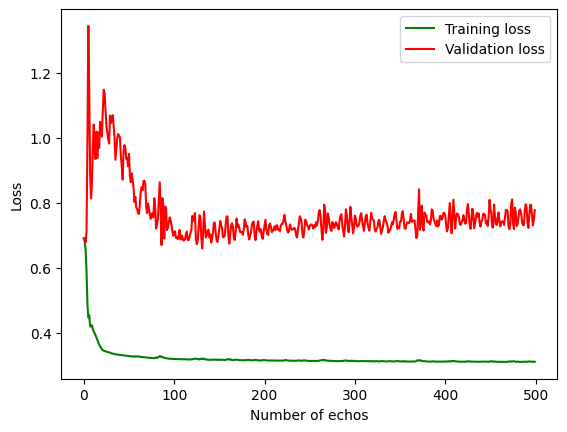

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], color='green')
plt.plot(hist.history['val_loss'], color='red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Number of echos')
plt.ylabel('Loss')

4/4 [==============================] - 0s 53ms/step


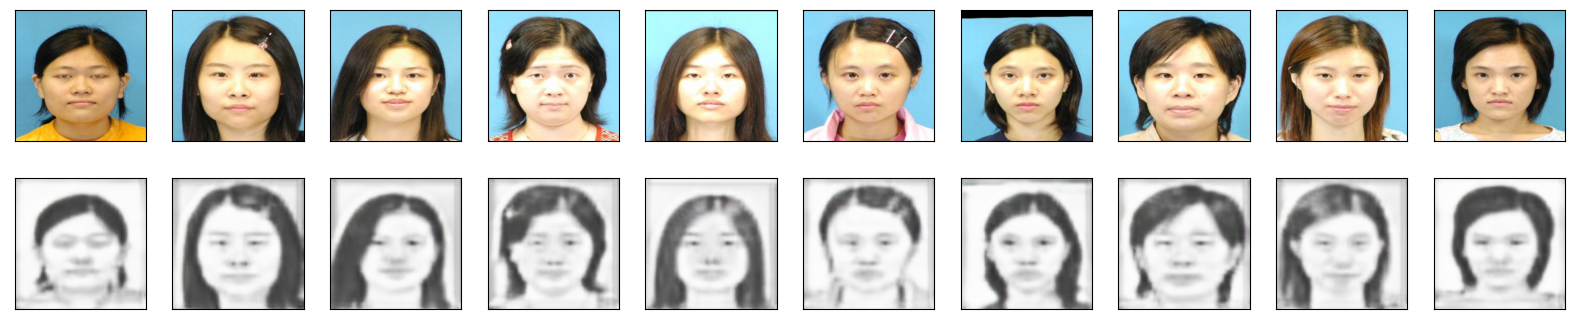

In [13]:
decoded_imgs = model_convAE.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()